# Utilização das RNAs em Aprendizado Supervisionado

As Redes Neurais Artificiais (RNAs) são amplamente utilizadas em tarefas de aprendizado supervisionado, especialmente em problemas de classificação e regressão. Abaixo iremos ver detalhadamente como as RNAs são aplicadas a essas tarefas, destacando a estrutura e abordagens específicas para cada tipo de problema.

## Classificação
Classificação é uma das principais tarefas em aprendizado de máquina e Deep Learning, onde o objetivo é categorizar os dados de entrada em classes pré-definidas.

### Classificação Binária
- **Objetivo**: Prever duas classes exclusivas (0 ou 1, verdadeiro ou falso, sim ou não).
- **Exemplos de Aplicação**: Detecção de spam em e-mails, diagnóstico médico (doença presente ou ausente), aprovação de crédito.

### Classificação Multiclasse
- **Objetivo**: Prever entre três ou mais classes que são mutuamente exclusivas.
- **Exemplos de Aplicação**: Classificação de tipos de flores, identificação de dígitos escritos à mão, categorização de notícias.

### Considerações Específicas
- **Representação do Target**: Em classificação multiclasse, o target é geralmente representado em formato "one-hot encoding" para que cada classe seja representada por um vetor binário. (iremos ver isto em códigos mais a frente)
- **Função de Ativação na Camada de Saída**:
  - **Binária**: Utiliza-se a função sigmoid, que fornece uma saída entre 0 e 1, representando a probabilidade da classe positiva.
  - **Multiclasse**: Emprega-se a função softmax, que generaliza a função sigmoid para múltiplas classes, fornecendo uma distribuição de probabilidade sobre as várias classes.

## Regressão
Em contraste com a classificação, a regressão lida com a previsão de um valor contínuo.

### Objetivo
- Prever uma quantidade contínua a partir de variáveis de entrada.
- **Exemplos de Aplicação**: Previsão de preços de imóveis, estimativa de demanda de produtos, previsão de índices de poluição.

### Considerações Específicas
- **Representação do Target**: O target é um valor numérico contínuo.
- **Função de Ativação na Camada de Saída**: Geralmente usa-se a função de ativação linear (ou identidade) que permite que a rede possa prever valores em uma ampla gama.

## Abordagens Comuns
- **Preparação dos Dados**: Independente do tipo de tarefa, é crucial a preparação e pré-processamento adequados dos dados, incluindo normalização ou padronização dos recursos de entrada e, no caso de classificação multiclasse, a aplicação de "one-hot encoding" ao target.
- **Escolha da Função de Perda**:
  - **Classificação**: binary_crossentropy (binária) ou categorical_crossentropy (multiclasse).
  - **Regressão**: mean_squared_error, mean_absolute_error, entre outras métricas para regressão.
- **Seleção do Otimizador**: Otimizadores como Adam e SGD são comumente utilizados, ajustando os pesos da rede durante o treinamento para minimizar a função de perda.

# Estrutura de uma Rede Neural Artificial

A arquitetura fundamental de uma Rede Neural Artificial é dividida em três partes principais: a camada de entrada, as camadas ocultas, e a camada de saída. Cada uma dessas partes desempenha um papel crucial no aprendizado de padrões complexos dos dados.

## Camada de Entrada

- **Quantidade de Colunas do X (Features)**: A camada de entrada é a primeira interface da rede com os dados. O número de neurônios nesta camada deve ser igual ao número de características (features) dos dados de entrada. Cada neurônio nesta camada representa uma variável de entrada independente.

## Camadas Ocultas

### Função de Ativação

- As camadas ocultas são responsáveis por transformar os sinais de entrada em algo que a camada de saída possa usar para realizar a tarefa desejada (por exemplo, classificação ou regressão). As funções de ativação ajudam a introduzir não-linearidade no modelo, permitindo que a rede aprenda padrões complexos e abstrações.
- **Tipos Comuns de Funções de Ativação**:
  - **ReLU (Rectified Linear Unit)**: Permite passar valores positivos enquanto os valores negativos são ajustados para zero. É a função de ativação mais utilizada devido à sua eficiência computacional e capacidade de mitigar o problema do desvanecimento do gradiente em redes profundas.
  - **Sigmoid**: Transforma os valores de entrada para um intervalo entre 0 e 1. É comumente usada na última camada de redes destinadas à classificação binária, devido à sua interpretação probabilística.
  - **Tanh (Hyperbolic Tangent)**: Similar à função sigmoid, mas transforma os valores para um intervalo entre -1 e 1. Frequentemente usada nas camadas ocultas pela sua capacidade de centralizar os dados de saída.

### Quantidade de Neurônios

- A quantidade de neurônios em cada camada oculta é um fator determinante na capacidade da rede de capturar a complexidade dos dados. Um número maior de neurônios pode aumentar a capacidade da rede de aprender, mas também pode levar a um maior risco de overfitting.
- **Determinação da Quantidade de Neurônios**: Não existe uma regra exata para a escolha do número de neurônios nas camadas ocultas; essa decisão é geralmente baseada na experiência, experimentação e validação cruzada.

## Camada de Saída

### Classificação Binária

- **Quantidade de Neurônios**: 1. Um único neurônio é suficiente para modelar a probabilidade de a entrada pertencer a uma das duas classes.
- **Função de Ativação**: Sigmoid. Esta função é ideal para problemas de classificação binária, pois mapeia a saída do modelo para um valor entre 0 e 1, que pode ser interpretado como a probabilidade da classe positiva.

### Classificação Multiclasse

- **Quantidade de Neurônios**: Número de classes. Cada neurônio na camada de saída representa uma classe única, e a rede deve prever a qual classe a entrada pertence.
- **Função de Ativação**: Softmax. A função softmax é adequada para classificação multiclasse, pois ela normaliza as saídas para uma distribuição de probabilidade sobre as classes, garantindo que a soma das probabilidades de todas as classes seja 1.

### Regressão

- **Quantidade de Neurônios**: 1. Para tarefas de regressão, um único neurônio é suficiente, pois o objetivo é prever um valor contínuo.
- **Função de Ativação**: Linear (ou nenhuma função de ativação especificada). A função linear é a escolha padrão para problemas de regressão, pois permite que a rede produza uma gama de valores contínuos sem restringir a saída a um intervalo específico.


In [1]:
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
# o input_dim representa quantas colunas tem o X
input_dim = 3

# Modelo para Classificação Binária
modelo_classificacao_binaria = models.Sequential([
    # Camada de entrada definida na primeira camada oculta
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),  # input_dim é a quantidade de features
    # Camadas ocultas
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    # Camada de saída para classificação binária com 1 neurônio e função de ativação sigmoid
    layers.Dense(1, activation='sigmoid')
])


# Modelo para Classificação Multiclasse (5 classes)
modelo_classificacao_multiclasse = models.Sequential([
    # Camada de entrada definida na primeira camada oculta
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),  # input_dim é a quantidade de features
    # Camadas ocultas
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    # Camada de saída para classificação multiclasse com 5 neurônios (uma por classe)
    # e função de ativação softmax para distribuição de probabilidade entre as classes
    layers.Dense(5, activation='softmax')
])


# Modelo para Regressão
modelo_regressao = models.Sequential([
    # Camada de entrada definida na primeira camada oculta
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),  # input_dim é a quantidade de features
    # Camadas ocultas
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    # Camada de saída para regressão com 1 neurônio
    # Função de ativação linear é usada para previsão de valores contínuos
    layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Tratamento de Dados Antes do Treinamento

O tratamento adequado dos dados antes do treinamento de Redes Neurais Artificiais é crucial para o desempenho e eficácia do modelo. Este processo inclui a separação dos dados, normalização, e transformações específicas para tarefas de classificação ou regressão.

## Separação dos Dados em X e y

- **X (Features)**: Conjunto de características ou variáveis independentes que são usadas como entrada para o modelo.
- **y (Target)**: Variável dependente que o modelo tenta prever. Representa as labels ou valores de saída correspondentes às entradas.

## Separação dos Dados de Treinamento, Validação e Teste

### Conceito de Validação

- A validação é o processo de avaliar a eficácia de um modelo usando dados que não foram vistos durante o treinamento.

### Processo de Separação

- Os dados são divididos em conjuntos de treinamento, validação e teste.
  - **Treinamento**: Usado para ajustar os pesos do modelo.
  - **Validação**: Usado para ajustar os hiperparâmetros e evitar o overfitting.
  - **Teste**: Usado para avaliar a performance final do modelo.

## Normalização dos Dados

### Importância da Normalização para RNAs

- A normalização ajuda a garantir que todos os inputs do modelo estejam em uma escala similar, facilitando a convergência durante o treinamento e melhorando o desempenho geral.

### Uso do MinMax Scaler com Função de Ativação ReLU

- **MinMax Scaler**: Escala cada característica para um intervalo especificado, geralmente entre 0 e 1.
- Usar o MinMax Scaler é particularmente benéfico com a função de ativação ReLU para evitar valores negativos que poderiam inativar os neurônios.

### Aplicação da Normalização

- **fit_transform**: Usado no conjunto de treinamento para calcular os parâmetros de escala e aplicar a transformação.
- **transform**: Usado nos conjuntos de validação e teste para aplicar a mesma transformação do conjunto de treinamento, garantindo a consistência entre os dados.

## Classificação

### Normalização Apenas do X

- Para tarefas de classificação, normalmente apenas os dados de entrada (X) são normalizados, enquanto os labels (y) são transformados conforme a necessidade do problema.

### Transformação do y para Categórico

- Em classificações multiclasse, os labels são frequentemente convertidos para o formato categórico (one-hot encoding) para facilitar o treinamento e avaliação do modelo.

### Classificação Binária

- Para classificação binária, o y é mantido como está, geralmente codificado como 0 ou 1, representando as duas classes.

## Regressão

### Normalização de X e y

- Tanto os dados de entrada quanto os de saída são normalizados para melhorar a estabilidade e a eficiência do treinamento.

### Uso de um Scaler para X e Outro para y

- Normalmente, utilizam-se escaladores separados para X e y, permitindo que cada conjunto de dados seja normalizado de maneira adequada e independente.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [4]:
# Criação de dados hipotéticos para Classificação Multiclasse
dados_multiclasse = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'classe': np.random.randint(0, 5, 100)  # 5 classes diferentes
})
dados_multiclasse.head()

,feature1,feature2,feature3,classe
0,0.582270,0.338174,0.838845,3
1,0.194789,0.853980,0.429158,3
2,0.381557,0.092104,0.250123,2
3,0.806443,0.465488,0.856952,3
4,0.180071,0.435496,0.912371,4


In [5]:
# Separação dos dados em X e y para Classificação Multiclasse
X_multiclasse = dados_multiclasse.drop('classe', axis=1)
y_multiclasse = dados_multiclasse['classe']

# Divisão dos dados em treino, validação e teste
X_treino_multi, X_teste_multi, y_treino_multi, y_teste_multi = train_test_split(X_multiclasse, y_multiclasse, test_size=0.2, random_state=42)
X_treino_multi, X_validacao_multi, y_treino_multi, y_validacao_multi = train_test_split(X_treino_multi, y_treino_multi, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalização dos dados de entrada
scaler_multi = MinMaxScaler()
X_treino_multi_scaled = scaler_multi.fit_transform(X_treino_multi)
X_validacao_multi_scaled = scaler_multi.transform(X_validacao_multi)
X_teste_multi_scaled = scaler_multi.transform(X_teste_multi)

# Transformação dos labels em one-hot encoding para Classificação Multiclasse
encoder = OneHotEncoder()
y_treino_multi_encoded = encoder.fit_transform(y_treino_multi.values.reshape(-1, 1)).toarray()
y_validacao_multi_encoded = encoder.transform(y_validacao_multi.values.reshape(-1, 1)).toarray()
y_teste_multi_encoded = encoder.transform(y_teste_multi.values.reshape(-1, 1)).toarray()

In [6]:
y_teste_multi_encoded

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [7]:
# Criação de dados hipotéticos para Classificação Binária
dados_binarios = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'classe': np.random.randint(0, 2, 100)  # 2 classes diferentes
})
dados_binarios.head()

,feature1,feature2,feature3,classe
0,0.987533,0.587819,0.946924,1
1,0.583565,0.295230,0.686081,0
2,0.581097,0.611160,0.715426,1
3,0.357728,0.823436,0.887142,1
4,0.883949,0.284027,0.698103,1


In [8]:
# Separação dos dados em X e y para Classificação Binária
X_binarios = dados_binarios.drop('classe', axis=1)
y_binarios = dados_binarios['classe']

# Divisão dos dados em treino, validação e teste
X_treino_bin, X_teste_bin, y_treino_bin, y_teste_bin = train_test_split(X_binarios, y_binarios, test_size=0.2, random_state=42)
X_treino_bin, X_validacao_bin, y_treino_bin, y_validacao_bin = train_test_split(X_treino_bin, y_treino_bin, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalização dos dados de entrada
scaler_bin = MinMaxScaler()
X_treino_bin_scaled = scaler_bin.fit_transform(X_treino_bin)
X_validacao_bin_scaled = scaler_bin.transform(X_validacao_bin)
X_teste_bin_scaled = scaler_bin.transform(X_teste_bin)

# Não é necessário transformar y para Classificação Binária, pois já está no formato adequado (0 ou 1)

In [9]:
# Criação de dados hipotéticos para Regressão
dados_regressao = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'valor': np.random.rand(100) * 100  # Valores contínuos
})
dados_regressao.head()

,feature1,feature2,feature3,valor
0,0.300600,0.984805,0.617187,41.870192
1,0.043497,0.361123,0.023372,13.200254
2,0.704279,0.038514,0.084775,50.621140
3,0.283147,0.564540,0.860612,2.998391
4,0.346893,0.683763,0.347271,30.968105


In [10]:
# Separação dos dados em X e y para Regressão
X_regressao = dados_regressao.drop('valor', axis=1)
y_regressao = dados_regressao['valor']

# Divisão dos dados em treino, validação e teste
X_treino_reg, X_teste_reg, y_treino_reg, y_teste_reg = train_test_split(X_regressao, y_regressao, test_size=0.2, random_state=42)
X_treino_reg, X_validacao_reg, y_treino_reg, y_validacao_reg = train_test_split(X_treino_reg, y_treino_reg, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalização dos dados de entrada para Regressão
scaler_reg_X = MinMaxScaler()
X_treino_reg_scaled = scaler_reg_X.fit_transform(X_treino_reg)
X_validacao_reg_scaled = scaler_reg_X.transform(X_validacao_reg)
X_teste_reg_scaled = scaler_reg_X.transform(X_teste_reg)

# Normalização dos dados de saída (y) para Regressão
scaler_reg_y = MinMaxScaler()
y_treino_reg_scaled = scaler_reg_y.fit_transform(y_treino_reg.values.reshape(-1, 1))
y_validacao_reg_scaled = scaler_reg_y.transform(y_validacao_reg.values.reshape(-1, 1))
y_teste_reg_scaled = scaler_reg_y.transform(y_teste_reg.values.reshape(-1, 1))


# Compilação do Modelo

A compilação do modelo em Redes Neurais Artificiais é um passo crucial que prepara o modelo para o treinamento. Nesta fase, definimos a função de perda (loss), as métricas de avaliação e o otimizador. Além disso, podemos especificar técnicas de otimização adicionais para melhorar o desempenho do modelo durante o treinamento.

## Loss

A função de perda mede quão bem o modelo está performando durante o treinamento, fornecendo um valor numérico que o otimizador tenta minimizar.

### Classificação Binária

- **binary_crossentropy**: Utilizada quando há apenas duas classes de labels. Mede o desempenho de um modelo de classificação cuja saída é um valor de probabilidade entre 0 e 1.

### Classificação Multiclasse

- **categorical_crossentropy**: Aplicada em problemas de classificação onde há duas ou mais classes de labels. Requer que as labels sejam fornecidas em um formato categórico (geralmente one-hot encoded).

### Regressão

- **mean_squared_error (MSE)**: Utilizada para problemas de regressão, mede a média dos quadrados das diferenças entre os valores preditos e os reais.

## Metrics

Métricas são usadas para monitorar e avaliar o desempenho do modelo durante o treinamento e teste.

### Classificação

- **accuracy**: Mede a porcentagem de labels corretamente preditas pelo modelo. É a métrica mais comum para problemas de classificação.

### Regressão

- **mse (Mean Squared Error)**: Média dos quadrados das diferenças entre os valores preditos e os valores reais.
- **rmse (Root Mean Squared Error)**: Raiz quadrada do MSE, fornece uma medida da magnitude do erro na mesma unidade dos valores preditos.
- **mae (Mean Absolute Error)**: Média do valor absoluto das diferenças entre os valores preditos e os reais. Fornece uma ideia da magnitude do erro sem considerar sua direção.

## Otimizadores

Os otimizadores ajustam os pesos da rede com base nos dados de entrada e na função de perda para minimizar o erro.

- **Adam**: Um otimizador baseado em gradiente que adapta a taxa de aprendizado para cada peso do modelo, considerado eficiente e eficaz para uma grande variedade de problemas.
- **SGD (Stochastic Gradient Descent)**: Um dos otimizadores mais simples e mais utilizados. Atualiza os pesos de forma iterativa em direção ao gradiente da função de perda.

# Treinamento

O treinamento de uma Rede Neural Artificial envolve a utilização de conjuntos de dados específicos para treino e validação, além do uso de callbacks para otimização do processo de treinamento e monitoramento do desempenho do modelo através do histórico de treinamento.

## Utilização de X e y de Treinamento e Validação

- **X de Treinamento**: Conjunto de dados de entrada usados para treinar o modelo. Cada elemento de X corresponde a uma observação completa das características (features) usadas para previsão.
- **y de Treinamento**: Conjunto de dados de saída ou labels correspondentes ao X de treinamento. Representa a verdade fundamental que o modelo tenta aprender durante o treinamento.
- **X de Validação**: Conjunto de dados de entrada usados para validar a precisão do modelo durante o treinamento. Não é usado para ajustar os pesos do modelo, mas para avaliar sua performance.
- **y de Validação**: Conjunto de dados de saída ou labels correspondentes ao X de validação. Usado junto ao X de validação para avaliar a performance do modelo sem afetar o processo de aprendizado.

## Callbacks

Os callbacks são ferramentas utilizadas para visualizar, ajustar e salvar métricas de desempenho do modelo durante o treinamento. Eles permitem realizar ações em diferentes etapas do treinamento, como ajustar a taxa de aprendizado ou interromper o treinamento quando uma condição é atendida.

### ReduceLROnPlateau

- **Descrição**: Reduz a taxa de aprendizado quando uma métrica de avaliação parou de melhorar.
- **Parâmetros Principais**:
  - **Monitor**: Métrica a ser monitorada, como a perda de validação.
  - **Factor**: Fator pelo qual a taxa de aprendizado será reduzida. Novo_lr = lr * factor.
  - **Patience**: Número de épocas sem melhoria após o qual a taxa de aprendizado será reduzida.
  - **Min_lr**: Limite inferior da taxa de aprendizado.

### EarlyStopping

- **Descrição**: Interrompe o treinamento quando uma métrica monitorada deixa de melhorar.
- **Parâmetros Principais**:
  - **Monitor**: Métrica a ser monitorada para interrupção.
  - **Patience**: Número de épocas sem melhoria após o qual o treinamento será interrompido.
  - **Restore_best_weights**: Se verdadeiro, restaura os pesos do modelo do ponto onde a métrica monitorada teve o melhor valor.

## History

- **Descrição**: Objeto retornado pela função de treinamento do modelo contendo um registro dos valores das métricas de treinamento e validação ao longo das épocas.
- **Utilização**:
  - **Acesso a Métricas**: Permite acessar os valores de perda e outras métricas tanto para o conjunto de treinamento quanto para o de validação após cada época.
  - **Visualização de Desempenho**: Facilita a visualização do progresso do treinamento e a identificação de possíveis problemas, como overfitting ou underfitting, através de gráficos das métricas ao longo do tempo.


In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Plot do histórico para Classificação Binária
plt.figure(figsize=(14, 5))

# Configuração do ReduceLROnPlateau para reduzir a taxa de aprendizado quando uma métrica de avaliação parar de melhorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=5, min_lr=0.001, verbose=1)

# Configuração do EarlyStopping para interromper o treinamento quando uma métrica de avaliação parar de melhorar
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

<Figure size 1400x500 with 0 Axes>

Epoch 56: early stopping
Restoring model weights from the end of the best epoch: 26.


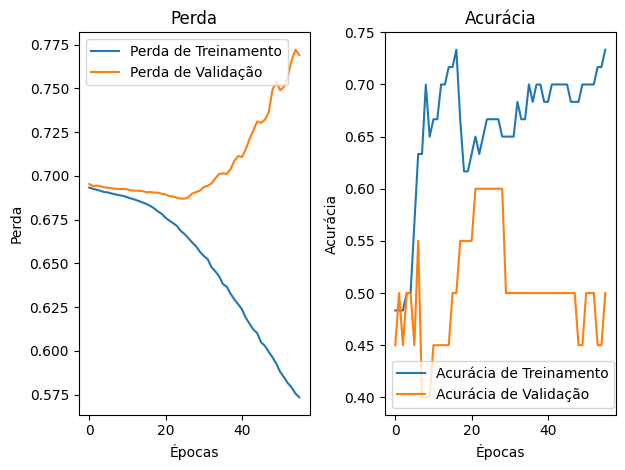

In [12]:
# Configuração do otimizador Adam com parâmetros padrão
adam_binaria = tf.keras.optimizers.Adam()
# Compilação do modelo de classificação binária
modelo_classificacao_binaria.compile(optimizer=adam_binaria,  # Utilização do otimizador Adam
                                     loss='binary_crossentropy',  # Uso da perda de entropia cruzada binária para classificação binária
                                     metrics=['accuracy'])  # Acurácia como métrica de avaliação

# Treinamento do modelo de classificação binária
history_binaria = modelo_classificacao_binaria.fit(
    X_treino_bin_scaled, y_treino_bin,  # Dados de treinamento
    epochs=100,  # Número de épocas
    batch_size=32,  # Tamanho do lote
    validation_data=(X_validacao_bin_scaled, y_validacao_bin),  # Dados de validação
    callbacks=[reduce_lr, early_stopping],  # Callbacks para ajuste da taxa de aprendizado e parada antecipada
    verbose = 0
)

# Plot da perda de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(history_binaria.history['loss'], label='Perda de Treinamento')
plt.plot(history_binaria.history['val_loss'], label='Perda de Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Plot da acurácia de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history_binaria.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history_binaria.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 1.


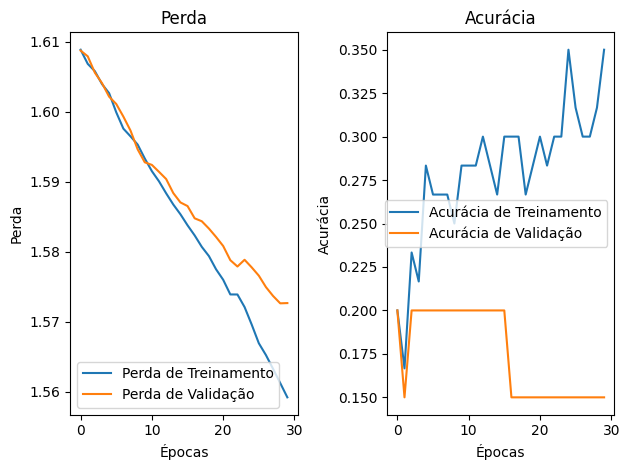

In [13]:
# Configuração do otimizador Adam com parâmetros padrão
adam_multiclasse = tf.keras.optimizers.Adam()
# Compilação do modelo de classificação multiclasse
modelo_classificacao_multiclasse.compile(optimizer=adam_multiclasse,  # Utilização do otimizador Adam
                                         loss='categorical_crossentropy',  # Uso da perda de entropia cruzada categórica para classificação multiclasse
                                         metrics=['accuracy'])  # Acurácia como métrica de avaliação

# Treinamento do modelo de classificação multiclasse
history_multiclasse = modelo_classificacao_multiclasse.fit(
    X_treino_multi_scaled, y_treino_multi_encoded,  # Dados de treinamento
    epochs=100,  # Número de épocas
    batch_size=32,  # Tamanho do lote
    validation_data=(X_validacao_multi_scaled, y_validacao_multi_encoded),  # Dados de validação
    callbacks=[reduce_lr, early_stopping],  # Callbacks para ajuste da taxa de aprendizado e parada antecipada
    verbose = 0
)

# Plot da perda de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(history_multiclasse.history['loss'], label='Perda de Treinamento')
plt.plot(history_multiclasse.history['val_loss'], label='Perda de Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Plot da acurácia de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history_multiclasse.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history_multiclasse.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 77: early stopping
Restoring model weights from the end of the best epoch: 47.


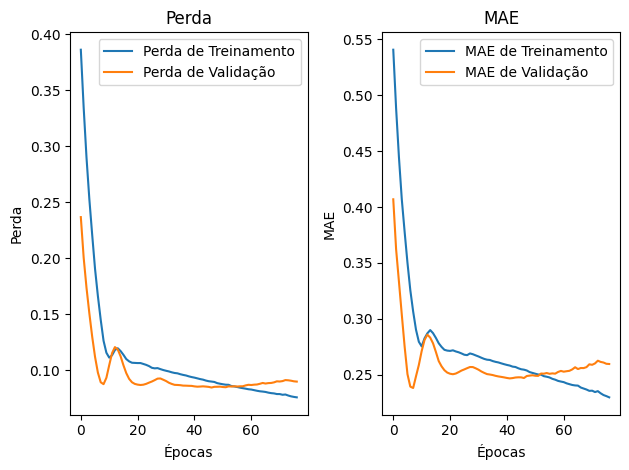

In [14]:
# Configuração do otimizador Adam com parâmetros padrão
adam_regressao = tf.keras.optimizers.Adam()
# Compilação do modelo de regressão
modelo_regressao.compile(optimizer=adam_regressao,  # Utilização do otimizador Adam
                         loss='mean_squared_error',  # Uso do erro quadrático médio como função de perda para regressão
                         metrics=['mae', 'mse'])  # Métricas incluem erro absoluto médio (MAE) e erro quadrático médio (MSE)

# Treinamento do modelo de regressão
history_regressao = modelo_regressao.fit(
    X_treino_reg_scaled, y_treino_reg_scaled,  # Dados de treinamento
    epochs=100,  # Número de épocas
    batch_size=32,  # Tamanho do lote
    validation_data=(X_validacao_reg_scaled, y_validacao_reg_scaled),  # Dados de validação
    callbacks=[reduce_lr, early_stopping],  # Callbacks para ajuste da taxa de aprendizado e parada antecipada
    verbose = 0
)

# Plot da perda de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(history_regressao.history['loss'], label='Perda de Treinamento')
plt.plot(history_regressao.history['val_loss'], label='Perda de Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Considerando 'mae' como métrica principal para o modelo de regressão
plt.subplot(1, 2, 2)
plt.plot(history_regressao.history['mae'], label='MAE de Treinamento')
plt.plot(history_regressao.history['val_mae'], label='MAE de Validação')
plt.title('MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Métricas de Avaliação

Avaliar a performance de modelos de Machine Learning é crucial para entender sua eficácia em tarefas de previsão. Existem várias métricas de avaliação, cada uma oferecendo insights sobre diferentes aspectos do desempenho do modelo. Estas métricas são divididas principalmente entre tarefas de classificação e regressão.

## Classificação

### Accuracy

- **Descrição**: A acurácia mede a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões feitas.
- **Utilização**: É uma medida inicial útil, mas pode ser enganosa em conjuntos de dados desbalanceados.

### Precision

- **Descrição**: A precisão mede a proporção de previsões positivas corretas (verdadeiros positivos) em relação ao total de previsões positivas feitas (verdadeiros positivos + falsos positivos).
- **Utilização**: Útil quando o custo de um falso positivo é alto.

### Recall

- **Descrição**: O recall (sensibilidade) mede a proporção de previsões positivas corretas (verdadeiros positivos) em relação ao total de casos positivos reais (verdadeiros positivos + falsos negativos).
- **Utilização**: Importante quando é crítico identificar todos os casos positivos.

### F1-Score

- **Descrição**: O F1-Score é a média harmônica da precisão e do recall, oferecendo um balanço entre essas duas métricas.
- **Utilização**: Útil quando se busca um equilíbrio entre precisão e recall, especialmente em conjuntos de dados desbalanceados.

## Regressão

### Mean Squared Error (MSE)

- **Descrição**: O MSE mede a média dos quadrados das diferenças entre os valores preditos pelo modelo e os valores reais.
- **Utilização**: Fornece uma noção da magnitude dos erros do modelo, penalizando mais fortemente grandes desvios.

### Root Mean Squared Error (RMSE)

- **Descrição**: O RMSE é a raiz quadrada do MSE, trazendo os valores de erro de volta para a unidade de medida original dos dados.
- **Utilização**: Oferece uma interpretação mais intuitiva da magnitude média dos erros do modelo.

### Mean Absolute Error (MAE)

- **Descrição**: O MAE mede a média do valor absoluto das diferenças entre as previsões e os valores reais.
- **Utilização**: Fornece uma medida direta da magnitude média dos erros do modelo, sem dar ênfase excessiva a grandes desvios, ao contrário do MSE.


In [15]:
from sklearn.metrics import classification_report

In [16]:
# Previsões para classificação binária
y_pred_bin = (modelo_classificacao_binaria.predict(X_teste_bin_scaled) > 0.5).astype("int32")

# Classification Report para Classificação Binária
print("Relatório de Classificação - Classificação Binária:")
print(classification_report(y_teste_bin, y_pred_bin, target_names=['Classe 0', 'Classe 1']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Relatório de Classificação - Classificação Binária:
              precision    recall  f1-score   support

    Classe 0       0.33      1.00      0.50         6
    Classe 1       1.00      0.14      0.25        14

    accuracy                           0.40        20
   macro avg       0.67      0.57      0.38        20
weighted avg       0.80      0.40      0.33        20



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Previsões para classificação multiclasse
y_pred_multi = modelo_classificacao_multiclasse.predict(X_teste_multi_scaled)
y_pred_multi_classes = np.argmax(y_pred_multi, axis=1)

# Conversão das labels one-hot encoded para suas classes correspondentes
y_teste_multi_classes = np.argmax(y_teste_multi_encoded, axis=1)

# Calculamos as métricas
acc_multi = accuracy_score(y_teste_multi_classes, y_pred_multi_classes)
prec_multi = precision_score(y_teste_multi_classes, y_pred_multi_classes, average='macro')
rec_multi = recall_score(y_teste_multi_classes, y_pred_multi_classes, average='macro')
f1_multi = f1_score(y_teste_multi_classes, y_pred_multi_classes, average='macro')

print("\nClassificação Multiclasse:")
print("Acurácia:", acc_multi)
print("Precisão:", prec_multi)
print("Recall:", rec_multi)
print("F1-Score:", f1_multi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step

Classificação Multiclasse:
Acurácia: 0.1
Precisão: 0.02
Recall: 0.2
F1-Score: 0.03636363636363636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Previsões para regressão
y_pred_reg = modelo_regressao.predict(X_teste_reg_scaled)
# Desnormalização das previsões de regressão
y_pred_reg_desnorm = scaler_reg_y.inverse_transform(y_pred_reg)

# Desnormalização dos dados reais de teste para comparação
y_teste_reg_desnorm = scaler_reg_y.inverse_transform(y_teste_reg_scaled.reshape(-1, 1))

# Calculamos as métricas
mse_reg = mean_squared_error(y_teste_reg_desnorm, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)  # Calculando RMSE a partir do MSE
mae_reg = mean_absolute_error(y_teste_reg_desnorm, y_pred_reg)

print("\nRegressão:")
print("MSE:", mse_reg)
print("RMSE:", rmse_reg)
print("MAE:", mae_reg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

Regressão:
MSE: 3725.3170747597783
RMSE: 61.03537560103795
MAE: 54.51005194783541
